In [143]:
import json
import pandas as pd
from eunjeon import Mecab
import eunjeon
m=Mecab()
from collections import Counter
import collections
import re

with open('c:\IG\혜화역1번출구_.json','r') as f:
    insta_dict1=json.load(f)
with open('c:\IG\혜화역2번출구_.json','r') as f:
    insta_dict2=json.load(f)
with open('c:\IG\혜화역3번출구_.json','r') as f:
    insta_dict3=json.load(f)
with open('c:\IG\혜화역4번출구_.json','r') as f:
    insta_dict4=json.load(f)
with open('c:\IG\혜화역출구전체_.json','r') as f:
    insta_dict=json.load(f)

In [144]:
# #데이터 통합과정
#  insta_dict = {'id':[],
#               'date': [],
#               'like': [],
#               'text': [],
#               'hashtag': [],
#               'img': []}
# for i in insta_dict.keys():
#     insta_dict[i] = insta_dict1[i] + insta_dict2[i] + insta_dict3[i]+ insta_dict4[i]
    
# with open('c:\IG\혜화역출구전체_.json', 'w') as f:
#     json.dump(insta_dict, f, indent=4)

In [145]:
insta_dicts=[insta_dict1, insta_dict2, insta_dict3, insta_dict4, insta_dict]
list1=[]
list2=[]
list3=[]
list4=[]
list_=[]
for q in insta_dicts:  
    for w in range(len(q['id'])):
        try:
            num=int(re.sub('[^0-9]','',str(q['like'][w])))
        except:
            num=0
        
        if q== insta_dict1:
            list1.append([q['id'][w],(num),q['text'][w],q['hashtag'][w]])
        elif q== insta_dict2:           
            list2.append([q['id'][w],num,q['text'][w],q['hashtag'][w]])
        elif q== insta_dict3:           
            list3.append([q['id'][w],num,q['text'][w],q['hashtag'][w]])
        elif q== insta_dict4:           
            list4.append([q['id'][w],num,q['text'][w],q['hashtag'][w]])
        elif q==insta_dict:
            list_.append([q['id'][w],num,q['text'][w],q['hashtag'][w]])


In [146]:
column=['id','like','text','hashtag']
list_df1=pd.DataFrame(list1,columns=column)
list_df2=pd.DataFrame(list2,columns=column)
list_df3=pd.DataFrame(list3,columns=column)
list_df4=pd.DataFrame(list4,columns=column)
list_df=pd.DataFrame(list_,columns=column)

In [147]:
list_df1.keys()

Index(['id', 'like', 'text', 'hashtag'], dtype='object')

In [148]:
list_df1.describe()

,like
count,2435.000000
mean,200.375770
std,4775.719538
min,0.000000
25%,15.000000
50%,26.000000
75%,56.000000
max,216310.000000


In [149]:
#like top5 id
top5_id1=list_df1.groupby(list_df1['id'],as_index=False)['like'].sum().sort_values(by='like',ascending=False)[:5]['id']
top5_id2=list_df2.groupby(list_df2['id'],as_index=False)['like'].sum().sort_values(by='like',ascending=False)[:5]['id']
top5_id3=list_df3.groupby(list_df3['id'],as_index=False)['like'].sum().sort_values(by='like',ascending=False)[:5]['id']
top5_id4=list_df4.groupby(list_df4['id'],as_index=False)['like'].sum().sort_values(by='like',ascending=False)[:5]['id']

In [150]:
#top 5 id와 like
list_df1.groupby(list_df1['id'],as_index=False)['like'].sum().sort_values(by='like',ascending=False)[:5]

,id,like
243,hyeji900505,340221
586,the.wook_luv,45177
176,from_instar,11924
381,luscious__scoops,9313
219,hema_tearoom7222,3785


In [151]:
top20_ids=[]
for i in top5_id1:
    top20_ids.append(i)
for i in top5_id2:
    top20_ids.append(i)
for i in top5_id3:
    top20_ids.append(i)
for i in top5_id4:
    top20_ids.append(i)
print(len(top20_ids))

20


In [152]:
top20_text=[]
top20_tags=[]
for i in top20_ids:
    for j in range(len(insta_dict['id'])):
        if i==insta_dict['id'][j]:
            top20_text.append(insta_dict['text'][j])
            top20_tags.append(insta_dict['hashtag'][j])
                              
print(len(top20_text))
print(len(top20_tags))

2530
2530


In [153]:
text_noun=[]
for i in top20_text:
    for j in i:
        text_noun.append(j)
        

In [154]:
top20_noun={}
noun=[]
for i in text_noun:
    for j in m.nouns(i):
        noun.append(j)
top20_noun['noun']=noun

In [155]:
c=(Counter(top20_noun['noun']))
c.most_common()[:50]

[('분', 910),
 ('거리', 762),
 ('위치', 374),
 ('초', 372),
 ('오늘', 340),
 ('공연', 317),
 ('시', 299),
 ('월', 292),
 ('일', 272),
 ('수', 269),
 ('문의', 235),
 ('원', 233),
 ('중', 199),
 ('카펠라', 190),
 ('것', 161),
 ('너', 160),
 ('나', 154),
 ('날', 150),
 ('스타', 149),
 ('시간', 141),
 ('판매', 138),
 ('룸', 138),
 ('맛', 130),
 ('기록', 127),
 ('메뉴', 126),
 ('카페', 123),
 ('예약', 119),
 ('방문', 116),
 ('쿠키', 114),
 ('빠', 110),
 ('감사', 110),
 ('거', 109),
 ('주', 108),
 ('후', 107),
 ('아이스크림', 105),
 ('년', 101),
 ('내', 98),
 ('주말', 98),
 ('차', 98),
 ('예매', 97),
 ('스콘', 97),
 ('하루', 96),
 ('영화', 96),
 ('때', 96),
 ('주문', 96),
 ('티', 95),
 ('번', 94),
 ('그레이', 94),
 ('얼', 91),
 ('할인', 91)]

In [156]:
'''출구별 상위5개의 id의 글의 명사 분석 결과 시간과 위치, 문의, 주차 등 공연과 관련된 글이 많은 것으로 확인이 되었고
다음으로는 맛, 메뉴, 판매, 주문, 티 등 카페를 찾는 고객들이 주로 이용하는 것을 확인했습니다.'''

'출구별 상위5개의 id의 글의 명사 분석 결과 시간과 위치, 문의, 주차 등 공연과 관련된 글이 많은 것으로 확인이 되었고\n다음으로는 맛, 메뉴, 판매, 주문, 티 등 카페를 찾는 고객들이 주로 이용하는 것을 확인했습니다.'

In [157]:
toptag={}
tags=[]
for i in top20_tags:
    for j in i:
        tags.append(j)
toptag['tag']=tags

In [158]:
b=Counter(toptag['tag'])
b.most_common()[:50]

[('#혜화역2번출구', 988),
 ('#대학로', 973),
 ('#마로니에공원', 762),
 ('#대학로디저트', 754),
 ('#낙산공원', 724),
 ('#대학로카페', 697),
 ('#혜화카페', 688),
 ('#대학로맛집', 614),
 ('#혜화역1번출구', 606),
 ('#대학로테라스', 602),
 ('#대학로데이트', 589),
 ('#자몽', 560),
 ('#동숭동카페', 559),
 ('#취향저격', 537),
 ('#여심저격', 537),
 ('#성대', 495),
 ('#grapefruit', 491),
 ('#한성대', 482),
 ('#방통대', 480),
 ('#グレープフルーツ', 448),
 ('#대학로브런치', 446),
 ('#꿀자몽', 446),
 ('#드라이플라워', 427),
 ('#혜화맛집', 407),
 ('#루프탑', 398),
 ('#혜화역', 392),
 ('#평균', 368),
 ('#연습실도시락#서포트도시락#수제도시락', 367),
 ('#포장실대여#스터디룸대여', 367),
 ('#대학로극장', 367),
 ('#대학로카페추천', 364),
 ('#아이돌도시락#아이돌서포트', 356),
 ('#뮤지컬도시락#뮤지컬서포트#음방도시락', 355),
 ('#샴도시락#서포트#조공', 354),
 ('#혜화역맛집', 348),
 ('#이화동', 331),
 ('#카톡id', 318),
 ('#대학로공연', 313),
 ('#퇴근길선물#배우선물', 313),
 ('#맛스타그램', 307),
 ('#꿀자몽퐁당티', 304),
 ('#서울대병원', 301),
 ('#혜화역4번출구', 301),
 ('#혜화역3번출구', 296),
 ('#러셔스스쿱스', 289),
 ('#홈메이드아이스크림', 288),
 ('#핵존맛', 285),
 ('#대학로소나무길', 283),
 ('#취저카페', 280),
 ('#나몰라패밀리핫쇼', 273)]

In [159]:
'''해쉬태그들을 분석결과 마로니에 공원, 낙산공원, 서울대병원 등 주변 지역이름을 주로 태그했고
뮤지컬, 연극 등 즐길거리와
카페, 루프탑의 경우 메뉴의 아이템들이 주로 태그 됨.'''

'해쉬태그들을 분석결과 마로니에 공원, 낙산공원, 서울대병원 등 주변 지역이름을 주로 태그했고\n뮤지컬, 연극 등 즐길거리와\n카페, 루프탑의 경우 메뉴의 아이템들이 주로 태그 됨.'

In [163]:
df_tag=pd.DataFrame(c,columns=['tag', 'like'])

<ipython-input-174-c26b61e662e0>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


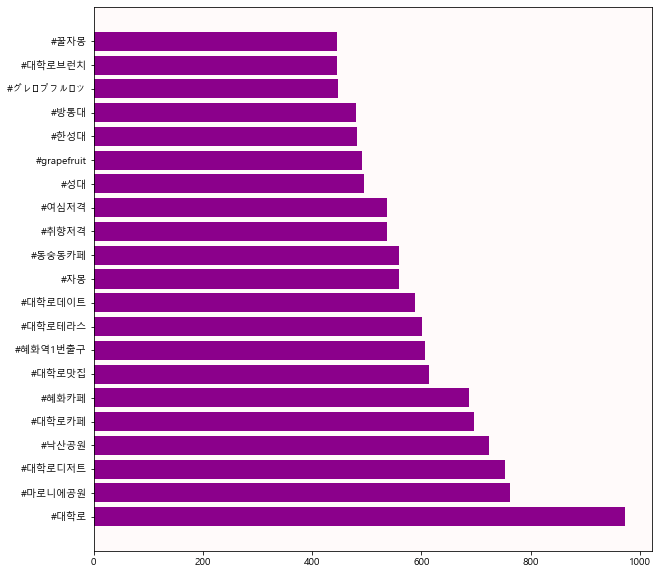

In [174]:
import matplotlib.pyplot as plt
c=b.most_common()[1:22]
plt.barh(df_tag['tag'],df_tag['like'],color='darkmagenta')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.family'] = 'Malgun Gothic'

  
# Setting the background color of the plot 
# using set_facecolor() method
ax = plt.axes()
ax.set_facecolor("snow")
  
plt.show()

In [165]:
df_tag

,tag,like
0,#대학로,973
1,#마로니에공원,762
2,#대학로디저트,754
3,#낙산공원,724
4,#대학로카페,697
5,#혜화카페,688
6,#대학로맛집,614
7,#혜화역1번출구,606
8,#대학로테라스,602
9,#대학로데이트,589
